# Tangram: map scseq to stseq analysis
Bin Xu
NOTES:
11/03/22: Adapted from Ju



### #. Mount my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/MyDrive
!mount --bind /content/drive/My\ Drive /content/MyDrive
# the magic % will help with the cd command :)
%cd /content

Mounted at /content/drive
/content


## #0. Install packages (need restart runtime before the analysis!)

These 4 packages are the basic packages needed to run this code.

In [ ]:
!pip install scanpy
!pip install squidpy
!pip install scikit-image
!pip install tangram-sc
!pip install gdown
# to upgrade
!pip install --upgrade gdown

## #1. Load datasets

In [ ]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.12.2 python-igraph==0.10.2 pynndescent==0.5.8
squidpy==1.2.2


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.3 scipy==1.7.1 pandas==1.3.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.10.1 pynndescent==0.5.7
squidpy==1.2.2

is the version I personally worked on. You can use tangram.yml to set up the environment.

This is loading the dataset for this project.

`adata_sc` stores single cell data.

`adata_st` stores spatial data.

### 1.1 Loading collected single cell data to adata_sc

In [ ]:
%cd '/content/MyDrive/spatial_scRNAseq_test'

/content/MyDrive/spatial_scRNAseq_test


In [ ]:
#!gdown --fuzzy 'https://drive.google.com/file/d/19O5HyRPUcaeYZut7m_wC7ND6Tb_vNVle/view?usp=share_link'

Downloading...
From: https://drive.google.com/uc?id=19O5HyRPUcaeYZut7m_wC7ND6Tb_vNVle
To: /content/pasca.log1p_liger_med_singleR_noglyc.h5ad
100% 2.08G/2.08G [00:16<00:00, 124MB/s]


In [ ]:
adata_sc = sc.read_h5ad("pasca.log1p_liger_med_singleR_noglyc.h5ad")

In [ ]:
adata_sc

AnnData object with n_obs × n_vars = 45214 × 25392
    obs: 'batch', 'condition', 'sampleID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_ribo_p', 'percent_ribo_p', 'sf', 'leiden', 'nowakowski_med'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'batch_colors', 'condition_colors', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_liger', 'X_umap'
    layers: 'counts', 'sf'
    obsp: 'connectivities', 'distances'

### 1.2 Loading spatial data and image data

In [ ]:
adata_st = sq.datasets.visium('V1_Human_Brain_Section_1')   
#adata_st = sq.datasets.visium('V1_Human_Brain_Section_2') 

In [ ]:
# adata_st = sq.datasets.visium_hne_adata() 
# highest score but uses mouse gene_ids

In [ ]:
img = sq.datasets.visium_fluo_image_crop()
#img = sq.datasets.visium_hne_image_crop()

### #1.3 preprocess the adata_st data using scanpy

https://scanpy-tutorials.readthedocs.io/en/latest/spatial/integration-scanorama.html#Reading-the-data

In [ ]:
sc.pp.calculate_qc_metrics(adata_st, inplace=True)

In [ ]:
adata_st.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 4910 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'>

In [ ]:
sc.pp.normalize_total(adata_st, inplace=True)
sc.pp.log1p(adata_st)
sc.pp.highly_variable_genes(adata_st, flavor="seurat", n_top_genes=2000, inplace=True)

In [ ]:
sc.pp.neighbors(adata_st)
sc.tl.umap(adata_st)
sc.tl.leiden(adata_st, key_added="clusters")

         Falling back to preprocessing with `sc.pp.pca` and default params.


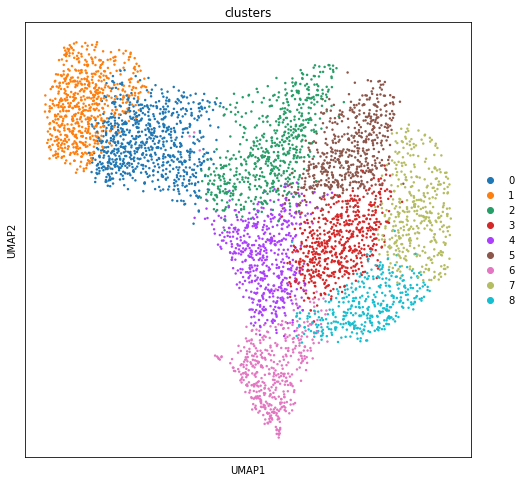

In [ ]:
sc.pl.umap(
    adata_st, color=["clusters"], palette=sc.pl.palettes.default_20
)

In [ ]:
adata_st

AnnData object with n_obs × n_vars = 4910 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
clusters_colors = dict(
    zip([str(i) for i in range(18)], adata_st.uns["clusters_colors"])
)

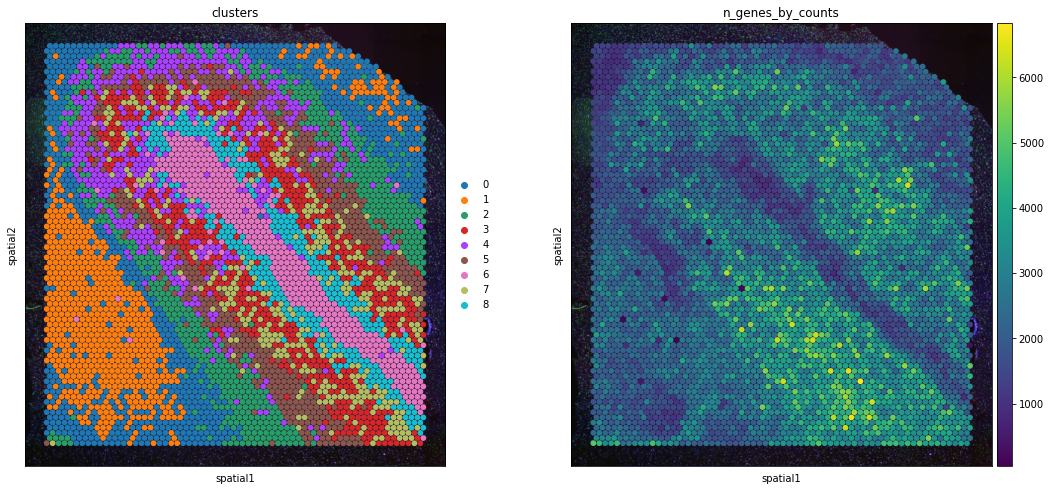

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
ad = adata_st.copy()
sc.pl.spatial(
  ad,
  img_key="hires",
  color=["clusters","n_genes_by_counts"],
  size=1.5,
  palette=[
    v
    for k, v in clusters_colors.items()
    if k in ad.obs.clusters.unique().tolist()
    ],
  legend_loc='right margin',
  show=False,
    )

plt.tight_layout()

In [ ]:
#adata_st.write_h5ad('adata_st_processed.h5ad')
adata_st = sc.read_h5ad('adata_st_processed.h5ad')

## #2. Run Tangram

### 2.1. Data structure

`{obs_key}` called to see the general structure.

In [ ]:
adata_sc.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 45214 × 25392
    obs: 'batch', 'condition', 'sampleID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_ribo_p', 'percent_ribo_p', 'sf', 'leiden', 'nowakowski_med'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'batch_colors', 'condition_colors', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_liger', 'X_umap'
    layers: 'counts', 'sf'
    obsp: 'connectivities', 'distances'>

In [ ]:
adata_st.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 4910 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sc.pl.spatial(
    adata_st, color="clusters", alpha=0.7, frameon=False, show=False, ax=axs[0]
)
sc.pl.umap(
    adata_sc, color="nowakowski_med", size=10, frameon=False, show=False, ax=axs[1]
)
plt.tight_layout()

In [ ]:
adata_sc.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 45214 × 25392
    obs: 'batch', 'condition', 'sampleID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_ribo_p', 'percent_ribo_p', 'sf', 'leiden', 'nowakowski_med'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'batch_colors', 'condition_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'nowakowski_med_colors', 'rank_genes_groups'
    obsm: 'X_liger', 'X_umap'
    layers: 'counts', 'sf'
    obsp: 'connectivities', 'distances'>

This can be used as a solution to some version controls.

### #2.2 Select training genes

In [ ]:
adata_sc.uns['log1p']["base"] = None

In [ ]:
sc.tl.rank_genes_groups(adata_sc, groupby="nowakowski_med", use_raw=False)
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

1320

In [ ]:
markers[1:20]

In [ ]:
# We can try another option for training gene selection
#sc.tl.rank_genes_groups(adata_sc, groupby="nowakowski_med", use_raw=False)
# sc.pp.highly_variable_genes(adata_sc)

### #2.3 Find alignment

We prepares the data using `pp_adatas`, which does the following:
- Takes a list of genes from user via the `genes` argument. These genes are used as training genes.
- Annotates training genes under the `training_genes` field, in `uns` dictionary, of each AnnData. 
- Ensure consistent gene order in the datasets (_Tangram_ requires that the the $j$-th column in each matrix correspond to the same gene).
- If the counts for a gene are all zeros in one of the datasets, the gene is removed from the training genes.
- If a gene is not present in both datasets, the gene is removed from the training genes.

In [ ]:
# This is an essential step for alignment
tg.pp_adatas(adata_sc, adata_st, genes=markers)

INFO:root:1301 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:21181 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [ ]:
# This step will take ~25min per 100 eporchs with cpu, it will take ~1min per 100 eporchs with cuda. This step has to be run with GPU option separately.
import torch
torch.cuda.empty_cache()
ad_map = tg.map_cells_to_space(adata_sc, adata_st,
    mode="cells",
#     mode="clusters",
#     cluster_label='cell_subclass',  # .obs field w cell types
    density_prior='rna_count_based',
    num_epochs=500,
#     device="cuda:0",
    device='cpu',
)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1301 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.495, KL reg: 0.010
Score: 0.654, KL reg: 0.002
Score: 0.676, KL reg: 0.001
Score: 0.681, KL reg: 0.001
Score: 0.682, KL reg: 0.001


INFO:root:Saving results..


### #2.4 Visualize cell type maps

In [ ]:
#ad_map.write("ad_map.h5ad")
ad_map = sc.read_h5ad("ad_map.h5ad")

In [ ]:
ad_map

AnnData object with n_obs × n_vars = 45214 × 4910
    obs: 'batch', 'condition', 'sampleID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_ribo_p', 'percent_ribo_p', 'sf', 'leiden', 'nowakowski_med'
    var: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

To visualize cell types in space, we invoke `project_cell_annotation` to transfer the `annotation` from the mapping to space. We can then call `plot_cell_annotation` to visualize it. You can set the `perc` argument to set the range to the colormap, which would help remove outliers.

In [ ]:
adata_st.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 4910 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'log1p', 'hvg', 'neighbors', 'umap', 'leiden', 'clusters_colors'
    obsm: 'spatial', 'X_pca', 'X_umap', 'tangram_ct_pred'
    obsp: 'distances', 'connectivities'>

In [ ]:
tg.project_cell_annotations(ad_map, adata_st, annotation="nowakowski_med")
annotation_list = list(pd.unique(adata_sc.obs['nowakowski_med']))
tg.plot_cell_annotation_sc(adata_st, annotation_list)

Output hidden; open in https://colab.research.google.com to view.

The first way to get a sense if mapping was successful is to look for known cell type patterns. To get a deeper sense, we can use the helper `plot_training_scores` which gives us four panels:

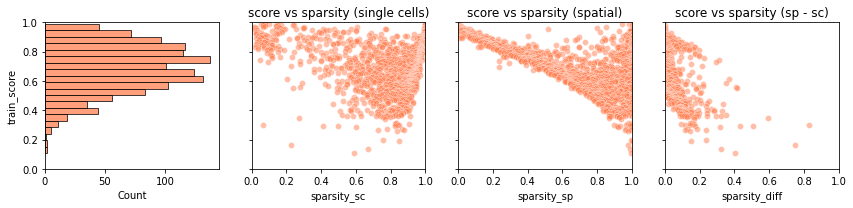

In [ ]:
tg.plot_training_scores(ad_map, bins=20, alpha=.5)

- The first panel is a histogram of the simlarity scores for each training gene.
- In the second panel, each dot is a training gene and we can observe the training score (y-axis) and the sparsity in the scRNA-seq data (x-axis) of each gene. 
- The third panel is similar to the second one, but contains the gene sparsity of the spatial data. Spatial data are usually more sparse than single cell data, a discrepancy which is often responsible for low quality mapping.
- In the last panel, we show the training scores as a function of the difference in sparsity between the dataset. For genes with comparable sparsity, the mapped gene expression is very similar to that in the spatial data. However, if a gene is quite sparse in one dataset (typically, the spatial data) but not in other, the mapping score is lower. This occurs as Tangram cannot properly matched the gene pattern because of inconsistent amount of dropouts between the datasets.

Although the above plots give us a summary of scores at single-gene level, we would need to know _which_ are the genes are mapped with low scores. These information are stored in the dataframe `.uns['train_genes_df']`; this is the dataframe used to build the four plots above.

In [ ]:
ad_map.uns['train_genes_df']

train_score  sparsity_sc  sparsity_sp  sparsity_diff
ppia         0.998169     0.000092     0.000000      -0.000092
ubb          0.997368     0.000092     0.000000      -0.000092
atp1b1       0.997035     0.014334     0.000000      -0.014334
tmsb4x       0.996994     0.002811     0.000000      -0.002811
ckb          0.996371     0.002765     0.000000      -0.002765
...               ...          ...          ...            ...
gabrb2       0.195180     0.078951     0.956790       0.877839
cdyl2        0.179485     0.425911     0.981481       0.555570
cntnap5c     0.160269     0.608241     0.993827       0.385586
dlx1as       0.144146     0.587777     0.990741       0.402964
kcnh6        0.136067     0.379131     0.996914       0.617783

[1280 rows x 4 columns]

### #2.5 Generate new spatial data via aligned single cells

If the mapping mode is `'cells'`, we can now generate the "new spatial data" using the mapped single cell: this is done via `project_genes`. The function accepts as input a mapping (`adata_map`) and corresponding single cell data (`adata_sc`). The result is a voxel-by-gene `AnnData`, formally similar to `adata_st`, but containing gene expression from the mapped single cell data rather than Visium. For downstream analysis, we always replace `adata_st` with the corresponding `ad_ge`.

In [ ]:
# it takes a few minutes
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
ad_ge

AnnData object with n_obs × n_vars = 4910 × 25392
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'uniform_density', 'rna_count_based_density'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'is_training'
    uns: 'batch_colors', 'condition_colors', 'leiden', 'log1p', 'neighbors', 'umap', 'rank_genes_groups', 'training_genes', 'overlap_genes'

- So far, we only inspected genes used to align the data (training genes), but the mapped single cell data, `ad_ge` contains the whole transcriptome. That includes more than 35k test genes.

In [ ]:
(ad_ge.var.is_training == False).sum()

24091

In [ ]:
#ad_ge.write("ad_ge.h5ad")
# re-imported ad_ge seems not recognized by tangram. might need rerun ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
ad_ge = sc.read_h5ad('ad_ge.h5ad')

In [ ]:
ad_ge.var

gene_ids    feature_types     mt  n_cells_by_counts  \
mir1302-2hg  ENSG00000243485  Gene Expression  False                  1   
al627309.1   ENSG00000238009  Gene Expression  False                 35   
al627309.3   ENSG00000239945  Gene Expression  False                  6   
al732372.1   ENSG00000236601  Gene Expression  False                  3   
al669831.5   ENSG00000237491  Gene Expression  False                722   
...                      ...              ...    ...                ...   
bx072566.1   ENSG00000277630  Gene Expression  False                  1   
ac023491.2   ENSG00000278633  Gene Expression  False                  1   
ac004556.1   ENSG00000276345  Gene Expression  False                357   
ac240274.1   ENSG00000271254  Gene Expression  False               1247   
fam231c      ENSG00000268674  Gene Expression  False                  1   

             mean_counts  pct_dropout_by_counts  total_counts  n_cells  \
mir1302-2hg     0.000022              99.997792           1.0        1   
al627309.1      0.000773              99.922737          35.0       35   
al627309.3      0.000132              99.986755           6.0        6   
al732372.1      0.000066              99.993377           3.0        3   
al669831.5      0.016887              98.406181         765.0      721   
...                  ...                    ...           ...      ...   
bx072566.1      0.000022              99.997792           1.0        1   
ac023491.2      0.000022              99.997792           1.0        1   
ac004556.1      0.008013              99.211921         363.0      357   
ac240274.1      0.028477              97.247241        1290.0     1247   
fam231c         0.000022              99.997792           1.0        1   

             is_training  
mir1302-2hg        False  
al627309.1         False  
al627309.3         False  
al732372.1         False  
al669831.5         False  
...                  ...  
bx072566.1         False  
ac023491.2         False  
ac004556.1         False  
ac240274.1         False  
fam231c            False  

[25392 rows x 9 columns]

In [100]:
import gc
gc.collect()

147

We can use `plot_genes` to inspect gene expression of test genes as well. Inspecting the test transcriptome is an essential to validate mapping. At the same time, we need to be careful that some prediction might disagree with spatial data because of the technical droputs.

It is convenient to compute the similarity scores of all genes, which can be done by `compare_spatial_geneexp`. This function accepts two spatial AnnDatas (ie voxel-by-gene), and returns a dataframe with simlarity scores for all genes. Training genes are flagged by the boolean field `is_training`. If we also pass single cell AnnData to `compare_spatial_geneexp` function like below, a dataframe with additional sparsity columns - sparsity_sc (single cell data sparsity) and sparsity_diff (spatial data sparsity - single cell data sparsity) will return. This is required if we want to call `plot_test_scores` function later with the returned datafrme from `compare_spatial_geneexp` function.

In [ ]:
df_all_genes = tg.compare_spatial_geneexp(ad_ge, adata_st, adata_sc)
df_all_genes

score  is_training  sparsity_sp  sparsity_sc  sparsity_diff
bmp8b       9.918019e-01         True     0.985947     0.999425      -0.013478
hspa6       9.908063e-01         True     0.945010     0.998828      -0.053818
mt-co1      9.864552e-01         True     0.000000     0.054983      -0.054983
mt-nd4      9.862380e-01         True     0.000000     0.099328      -0.099328
mt-co2      9.862313e-01         True     0.000407     0.074579      -0.074171
...                  ...          ...          ...          ...            ...
ap000755.2  7.712808e-09        False     0.999796     0.999978      -0.000182
linc01180   7.386007e-09        False     0.999796     0.999978      -0.000182
lrrc15      6.538451e-09        False     0.999796     0.999978      -0.000182
linc01388   5.507404e-09        False     0.999796     0.999978      -0.000182
nalcn-as1   2.521235e-09        False     0.999796     0.999978      -0.000182

[21181 rows x 5 columns]

The prediction on test genes can be graphically visualized using `plot_auc`:

In [ ]:
# sns.scatterplot(data=df_all_genes, x='score', y='sparsity_sp', hue='is_training', alpha=.5);  # for legacy
tg.plot_auc(df_all_genes);

<Figure size 432x288 with 0 Axes>

**This above figure is the most important validation plot in _Tangram_.** Each dot represents a gene; the x-axis indicates the score, and the y-axis the sparsity of that gene in the spatial data.  Unsurprisingly, the genes predicted with low score represents very sparse genes in the spatial data, suggesting that the _Tangram_ predictions correct expression in those genes. Note that curve observed above is typical of _Tangram_ mappings: the area under that curve is the most reliable metric we use to evaluate mapping.

Let's inspect a few predictions. Some of these genes are biologically sparse, but well predicted:

In [ ]:
# we have to use low letter
GOI=['pax6','sox2','foxg1','neurod2','prodh','ranbp1','crkl','hira']


In [ ]:
tg.plot_genes_sc(GOI, adata_measured=adata_st, adata_predicted=ad_ge, perc=0.02)

In [ ]:
plt.rcParams["figure.figsize"] = (20, 20)
ad = ad_ge.copy()
sc.pl.spatial(
  ad,
  img_key="hires",
  color=GOI,
  size=1.5,
  palette=[
    v
    for k, v in clusters_colors.items()
    if k in ad.obs.clusters.unique().tolist()
    ],
  legend_loc='right margin',
  show=False,
    )

plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

### #2.6 Deconvolution via alignment

The rationale for deconvolving with Tangram, is to constrain the number of mapped single cell profiles. This is different that most deconvolution method. Specifically, we set them equal to the number of segmented cells in the histology, in the following way:
- We pass `mode='constrained'`. This adds a filter term to the loss function, and a boolean regularizer.
- We set `target_count` equal to the total number of segmented cells. _Tangram_ will look for the best `target_count` cells to align in space.
- We pass a `density_prior`, containing the fraction of cells per voxel. 

In [ ]:
ad_map_d = tg.map_cells_to_space(
    adata_sc,
    adata_st,
    mode="constrained",
    target_count=adata_st.obs.cell_count.sum(),
    density_prior=np.array(adata_st.obs.cell_count) / adata_st.obs.cell_count.sum(),
    num_epochs=1000,
#     device="cuda:0",
    device='cpu',
)

Score: 0.613, KL reg: 0.125, Count reg: 5690.005, Lambda f reg: 4476.743
Score: 0.698, KL reg: 0.012, Count reg: 21.622, Lambda f reg: 715.952
Score: 0.701, KL reg: 0.012, Count reg: 0.250, Lambda f reg: 244.186
Score: 0.701, KL reg: 0.012, Count reg: 0.912, Lambda f reg: 170.869
Score: 0.701, KL reg: 0.012, Count reg: 1.067, Lambda f reg: 142.603
Score: 0.701, KL reg: 0.012, Count reg: 1.114, Lambda f reg: 123.257
Score: 0.701, KL reg: 0.012, Count reg: 1.458, Lambda f reg: 108.671
Score: 0.702, KL reg: 0.012, Count reg: 1.484, Lambda f reg: 100.865
Score: 0.702, KL reg: 0.012, Count reg: 1.426, Lambda f reg: 92.645
Score: 0.701, KL reg: 0.012, Count reg: 0.045, Lambda f reg: 85.330


In the same way as before, we can plot cell type maps:

In [101]:
ad_map

AnnData object with n_obs × n_vars = 45214 × 4910
    obs: 'batch', 'condition', 'sampleID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_ribo_p', 'percent_ribo_p', 'sf', 'leiden', 'nowakowski_med'
    var: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [107]:
tg.project_cell_annotations(ad_map, adata_st, annotation="nowakowski_med")
annotation_list = list(pd.unique(adata_sc.obs['nowakowski_med']))

# This old tg.plot_cell_annotation does not work!!!
#tg.plot_cell_annotation(adata_st, annotation_list, perc=0.02)

tg.plot_cell_annotation_sc(adata_st, annotation_list)

We validate mapping by inspecting the test transcriptome:

In [ ]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
df_all_genes = tg.compare_spatial_geneexp(ad_ge, adata_st, adata_sc)
tg.plot_auc(df_all_genes);

<Figure size 432x288 with 0 Axes>

And here comes the key part, where we will use the results of the previous deconvolution steps. Previously, we computed the absolute numbers of unique segmentation objects under each spot, together with their centroids. Let's extract them in the right format useful for _Tangram_. In the resulting dataframe, each row represents a single segmentation object (a cell). We also have the image coordinates as well as the unique centroid ID, which is a string that contains both the spot ID and a numerical index. _Tangram_ provides a convenient function to export the mapping between spot ID and segmentation ID to `adata.uns`.

In [ ]:
tg.create_segment_cell_df(adata_st)
adata_st.uns["tangram_cell_segmentation"].head()

spot_idx            y           x             centroids
0  AAATGGCATGTCTTGT-1  5304.000000  731.000000  AAATGGCATGTCTTGT-1_0
1  AAATGGCATGTCTTGT-1  5320.947519  721.331554  AAATGGCATGTCTTGT-1_1
2  AAATGGCATGTCTTGT-1  5332.942342  717.447904  AAATGGCATGTCTTGT-1_2
3  AAATGGCATGTCTTGT-1  5348.865384  558.924248  AAATGGCATGTCTTGT-1_3
4  AAATGGCATGTCTTGT-1  5342.124989  567.208502  AAATGGCATGTCTTGT-1_4

We can use `tangram.count_cell_annotation()` to map cell types as result of the deconvolution step to putative segmentation ID.

In [ ]:
tg.count_cell_annotations(
    ad_map,
    adata_sc,
    adata_st,
    annotation="cell_subclass",
)
adata_st.obsm["tangram_ct_count"].head()

x     y  cell_n  \
AAATGGCATGTCTTGT-1   641  5393      13   
AACAACTGGTAGTTGC-1  4208  1672      16   
AACAGGAAATCGAATA-1  1117  5117      28   
AACCCAGAGACGGAGA-1  1101  1274       5   
AACCGTTGTGTTTGCT-1   399  4708       7   

                                                            centroids  Pvalb  \
AAATGGCATGTCTTGT-1  [AAATGGCATGTCTTGT-1_0, AAATGGCATGTCTTGT-1_1, A...      1   
AACAACTGGTAGTTGC-1  [AACAACTGGTAGTTGC-1_0, AACAACTGGTAGTTGC-1_1, A...      1   
AACAGGAAATCGAATA-1  [AACAGGAAATCGAATA-1_0, AACAGGAAATCGAATA-1_1, A...      3   
AACCCAGAGACGGAGA-1  [AACCCAGAGACGGAGA-1_0, AACCCAGAGACGGAGA-1_1, A...      1   
AACCGTTGTGTTTGCT-1  [AACCGTTGTGTTTGCT-1_0, AACCGTTGTGTTTGCT-1_1, A...      1   

                    L4  Vip  L2/3 IT  Lamp5  NP  ...  L5 PT  Astro  L6b  Endo  \
AAATGGCATGTCTTGT-1   0    1        0      0   0  ...      1      1    0     0   
AACAACTGGTAGTTGC-1   0    5        1      1   1  ...      3      0    0     0   
AACAGGAAATCGAATA-1   0    1        0      2   0  ...      0      0    0     0   
AACCCAGAGACGGAGA-1   0    0        1      1   0  ...      0      1    0     0   
AACCGTTGTGTTTGCT-1   0    0        0      1   0  ...      1      0    0     0   

                    Peri  Meis2  Macrophage  CR  VLMC  SMC  
AAATGGCATGTCTTGT-1     0      0           1   0     0    0  
AACAACTGGTAGTTGC-1     0      0           0   0     0    0  
AACAGGAAATCGAATA-1     0      1           0   0     0    0  
AACCCAGAGACGGAGA-1     0      0           0   0     1    0  
AACCGTTGTGTTTGCT-1     0      0           0   0     0    0  

[5 rows x 27 columns]

And finally export the results in a new `AnnData` object.

In [ ]:
adata_segment = tg.deconvolve_cell_annotations(adata_st)
adata_segment.obs.head()

y           x             centroids cluster
0  5304.000000  731.000000  AAATGGCATGTCTTGT-1_0   Pvalb
1  5320.947519  721.331554  AAATGGCATGTCTTGT-1_1     Vip
2  5332.942342  717.447904  AAATGGCATGTCTTGT-1_2   L5 IT
3  5348.865384  558.924248  AAATGGCATGTCTTGT-1_3   L6 CT
4  5342.124989  567.208502  AAATGGCATGTCTTGT-1_4   L6 CT

Note that the AnnData object does not contain counts, but only cell type annotations, as results of the Tangram mapping.  Nevertheless, it's convenient to create such AnnData object for visualization purposes. Below you can appreciate how each dot is now not a Visium spot anymore, but a single unique segmentation object, with the mapped cell type.

[<AxesSubplot:title={'center':'cluster'}, xlabel='spatial1', ylabel='spatial2'>]

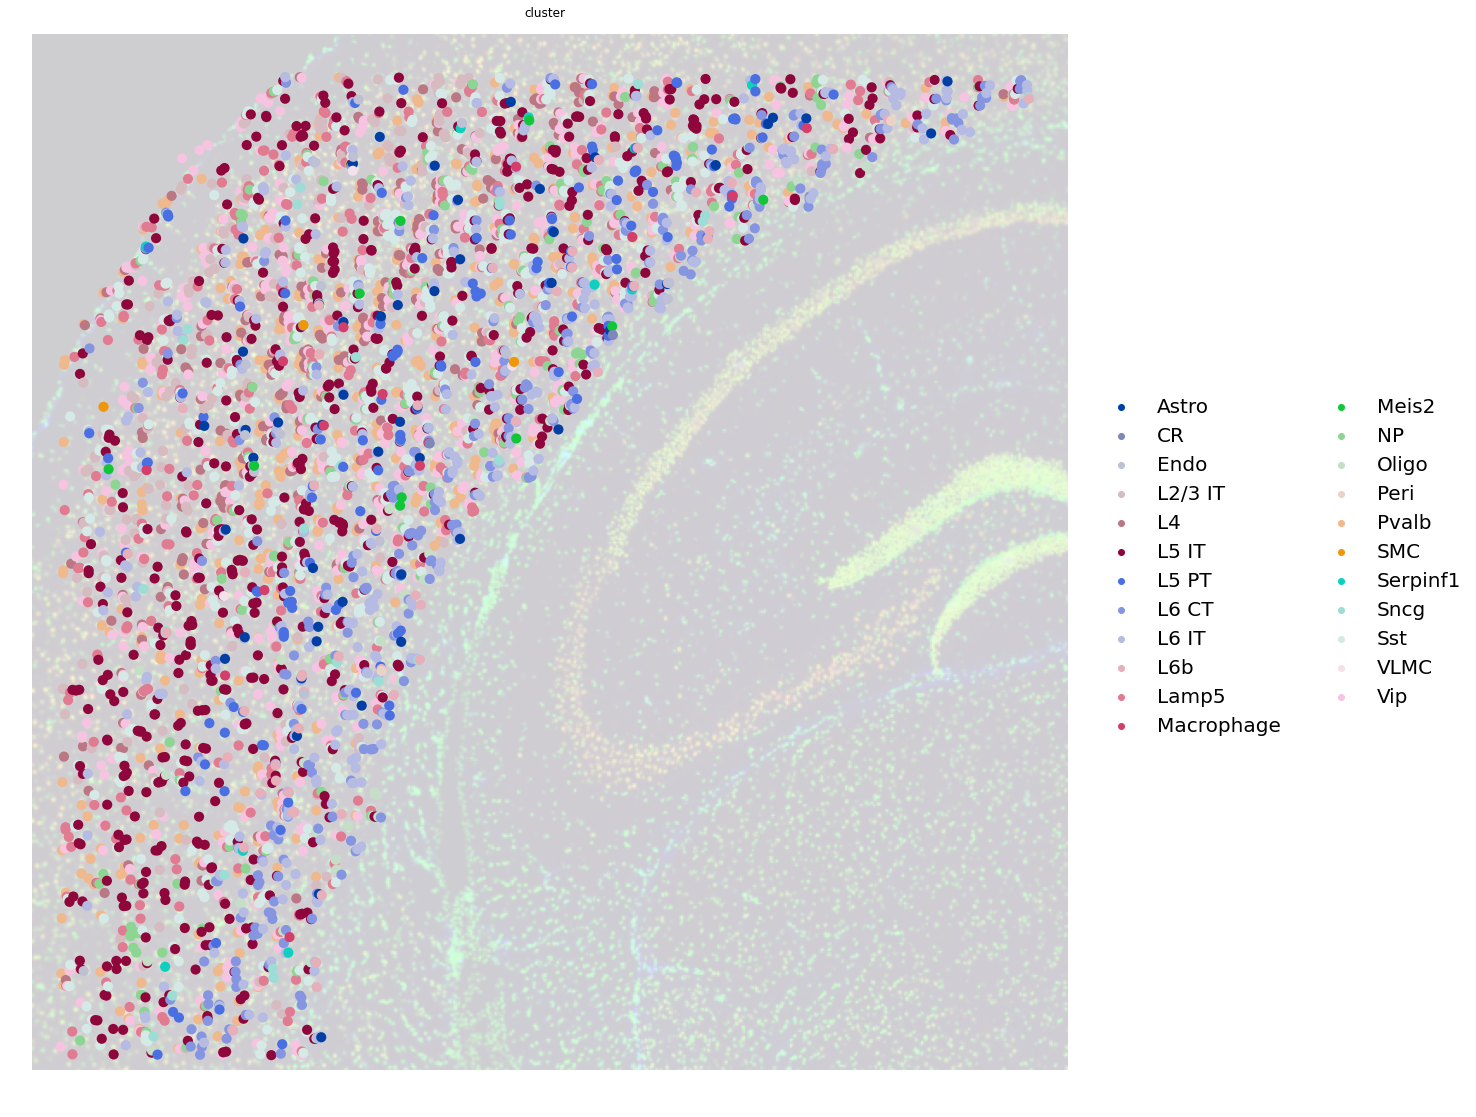

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sc.pl.spatial(
    adata_segment,
    color="cluster",
    size=0.4,
    show=False,
    frameon=False,
    alpha_img=0.2,
    legend_fontsize=20,
    ax=ax,
)

### #2.7 Generate high resolution maps

In [72]:
sf = adata_st.uns['spatial']['V1_Human_Brain_Section_1']["scalefactors"]["tissue_hires_scalef"]
img = sq.im.ImageContainer(adata_st.uns['spatial']['V1_Human_Brain_Section_1']['images']['hires'],
                           scale = sf, library_id = 'V1_Human_Brain_Section_1')

In [73]:
sq.im.process(img=img, layer="image", method="smooth")
sq.im.segment(                                                                                
    img=img,
    layer="image_smooth",
    method="watershed",
    channel=0,
)

In [74]:
adata_st.obs.columns

Index(['in_tissue', 'array_row', 'array_col', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'clusters', 'uniform_density', 'rna_count_based_density',
       'ctip2 (measured)'],
      dtype='object')

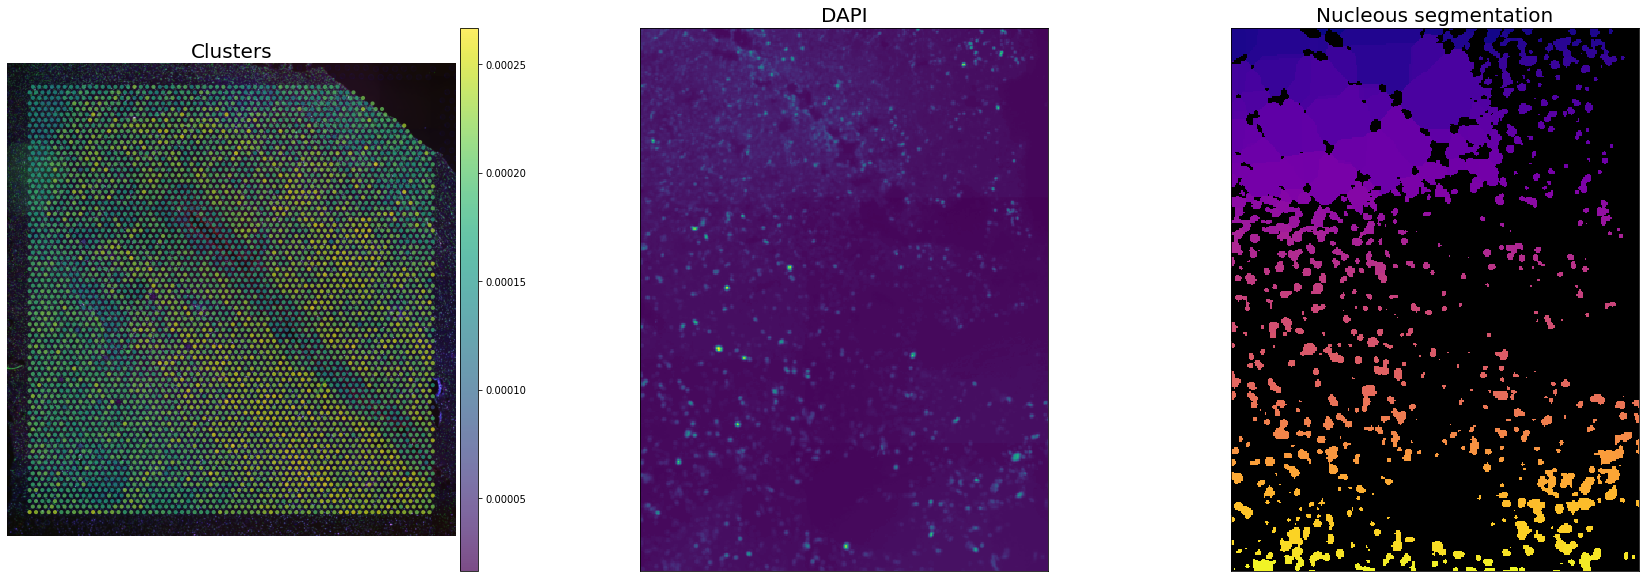

In [108]:
inset_y = 1500
inset_x = 1700
inset_sy = 400
inset_sx = 500

fig, axs = plt.subplots(1, 3, figsize=(30, 10))
# spatial how?
sc.pl.spatial(
    adata_st, 
    color="rna_count_based_density",   
    alpha=0.7, frameon=False, show=False, ax=axs[0], title=""
)
axs[0].set_title("Clusters", fontdict={"fontsize": 20})
rect = mpl.patches.Rectangle(
    (inset_y * sf, inset_x * sf),
    width=inset_sx * sf,
    height=inset_sy * sf,
    ec="yellow",
    lw=4,
    fill=False,
)
axs[0].add_patch(rect)

axs[0].axes.xaxis.label.set_visible(False)
axs[0].axes.yaxis.label.set_visible(False)

axs[1].imshow(
    img["image"][inset_y : inset_y + inset_sy, inset_x : inset_x + inset_sx, 0, 0]
    / 65536,
    interpolation="none",
)
axs[1].grid(False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title("DAPI", fontdict={"fontsize": 20})

crop = img["segmented_watershed"][
    inset_y : inset_y + inset_sy, inset_x : inset_x + inset_sx
].values.squeeze(-1)
crop = skimage.segmentation.relabel_sequential(crop)[0]
cmap = plt.cm.plasma
cmap.set_under(color="black")
axs[2].imshow(crop, interpolation="none", cmap=cmap, vmin=0.001)
axs[2].grid(False)
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_title("Nucleous segmentation", fontdict={"fontsize": 20});

In [76]:
features_kwargs = {
    "segmentation": {
        "label_layer": "segmented_watershed",
        "props": ["label", "centroid"],
        "channels": [1, 2],
    }
}
# calculate segmentation features
sq.im.calculate_image_features(
    adata_st,
    img,
    layer="image",
    key_added="image_features",
    n_jobs=4,
    features_kwargs=features_kwargs,
    features="segmentation",
    mask_circle=True,
)

  0%|          | 0/4910 [00:00<?, ?/s]

In [77]:
adata_st.obs["cell_count"] = adata_st.obsm["image_features"]["segmentation_label"]
sc.pl.spatial(adata_st, color=["cell_count"], frameon=False)

Output hidden; open in https://colab.research.google.com to view.

In [78]:
adata_st.obsm['image_features']

segmentation_label  \
AAACAAGTATCTCCCA-1                   1   
AAACAATCTACTAGCA-1                   1   
AAACACCAATAACTGC-1                   5   
AAACAGAGCGACTCCT-1                   2   
AAACAGCTTTCAGAAG-1                   2   
...                                ...   
TTGTTTCACATCCAGG-1                   4   
TTGTTTCATTAGTCTA-1                   1   
TTGTTTCCATACAACT-1                   6   
TTGTTTGTATTACACG-1                   2   
TTGTTTGTGTAAATTC-1                   2   

                                                segmentation_centroid  
AAACAAGTATCTCCCA-1                                       [[nan, nan]]  
AAACAATCTACTAGCA-1                                       [[nan, nan]]  
AAACACCAATAACTGC-1  [[1611.0, 1379.0609874152954], [1616.680272108...  
AAACAGAGCGACTCCT-1                   [[761.0, 496.0], [776.0, 481.0]]  
AAACAGCTTTCAGAAG-1               [[1725.0, 1054.0], [1740.0, 1069.0]]  
...                                                               ...  
TTGTTTCACATCCAGG-1  [[1350.0, 1365.0], [1357.4685354691076, 1358.1...  
TTGTTTCATTAGTCTA-1                                       [[nan, nan]]  
TTGTTTCCATACAACT-1  [[1521.0, 1106.4974958263772], [1524.698901098...  
TTGTTTGTATTACACG-1               [[1362.0, 1646.0], [1377.0, 1661.0]]  
TTGTTTGTGTAAATTC-1                 [[1249.0, 358.0], [1264.0, 343.0]]  

[4910 rows x 2 columns]

In [79]:
adata_st.obs["cell_count"] = adata_st.obsm["image_features"]["segmentation_label"]
sc.pl.spatial(adata_st, color=['rna_count_based_density'], frameon=False)

Output hidden; open in https://colab.research.google.com to view.

In [91]:
adata_st.uns["tangram_cell_segmentation"].head()

spot_idx            y            x             centroids
0  AAACAAGTATCTCCCA-1          NaN          NaN  AAACAAGTATCTCCCA-1_0
1  AAACAATCTACTAGCA-1          NaN          NaN  AAACAATCTACTAGCA-1_0
2  AAACACCAATAACTGC-1  1611.000000  1379.060987  AAACACCAATAACTGC-1_0
3  AAACACCAATAACTGC-1  1616.680272  1380.537962  AAACACCAATAACTGC-1_1
4  AAACACCAATAACTGC-1  1621.907738  1385.000000  AAACACCAATAACTGC-1_2

In [93]:
# avoid write into adata_st directly
ad = adata_st.copy()
sq.pl.spatial_scatter(
    ad,
    color=["EN-V1","RG-early"],
)

Output hidden; open in https://colab.research.google.com to view.

In [122]:
ad_map.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 45214 × 4910
    obs: 'batch', 'condition', 'sampleID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_ribo_p', 'percent_ribo_p', 'sf', 'leiden', 'nowakowski_med'
    var: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'>

In [131]:
ad_map.obs['nowakowski_med']._get_axis_name(axis=0)

'index'

In [132]:
#tg.create_segment_cell_df(ad)
ad.obs = pd.concat([adata_st.obs, adata_st.obsm["tangram_ct_pred"]], axis=1)
annotation_list = ad_map.obs['nowakowski_med']
tg.count_cell_annotations(
    adata_map = ad_map,
    adata_sc = adata_sc,
    adata_sp = ad,
    annotation = annotation_list(0),
)
# nowakowski_med
adata_st.obsm["tangram_ct_count"].head()

TypeError: ignored

In [98]:
ad_map

AnnData object with n_obs × n_vars = 45214 × 4910
    obs: 'batch', 'condition', 'sampleID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts_ribo_p', 'percent_ribo_p', 'sf', 'leiden', 'nowakowski_med'
    var: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [ ]:
adata_segment = tg.deconvolve_cell_annotations(adata_st)
adata_segment.obs.head()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sc.pl.spatial(
    adata_segment,
    color="cluster",
    size=0.4,
    show=False,
    frameon=False,
    alpha_img=0.2,
    legend_fontsize=20,
    ax=ax,
)